In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

print(tf.__version__)

2.4.1


In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
dataset.isna().sum() #gives the number of NaN values in the data frame
dataset = dataset.dropna()  #drop the raws with NaN  values 
#"Origin" column is categorical in fact, machine does not understand it! Instead we map it to categories and apply one-hot-encoder
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
#dataset.head()

In [5]:
#train-test split
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

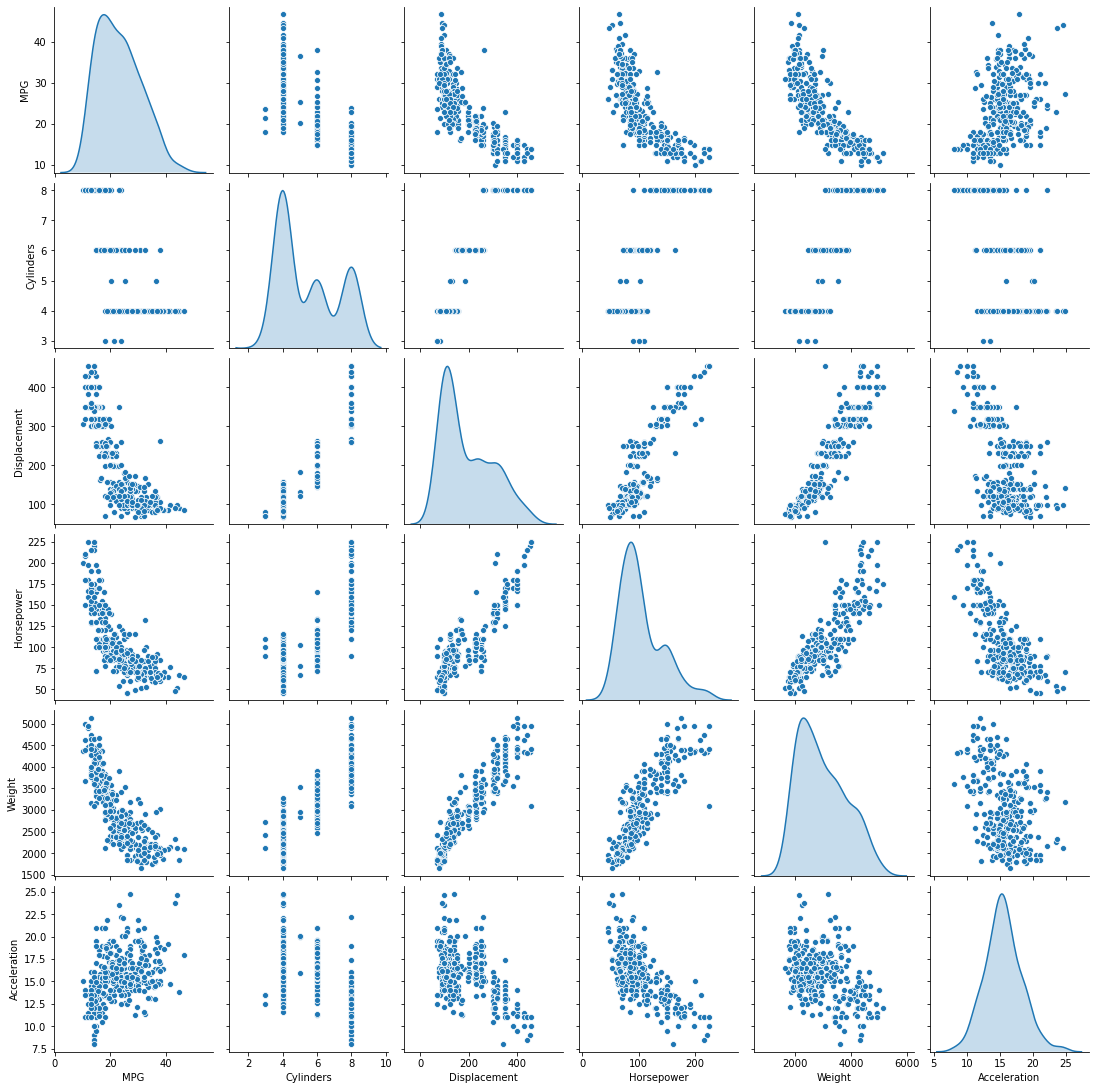

In [6]:
#Explotory Data Analysis

sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Horsepower", "Weight", "Acceleration"]], diag_kind = "kde")

In [7]:
train_dataset.describe().transpose()  #statistics

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [8]:
#taking the target label by pop method 
#MPG: target label, the model will learn over

train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')


In [9]:
#Normalization the dataset


normalizer = preprocessing.Normalization(input_shape=[9,])
normalizer.adapt( np.array(train_features))

#test_features = sklearn.preprocessing.StandardScaler().fit(test_features).transform(test_features.astype(float))


In [10]:
model = tf.keras.Sequential([
normalizer,
layers.Dense(units = 1)
])

# When the model containes some "hidden" variables which are not directly related to the inputs and outputs use this structure

#model = tf.keras.Sequential([
 #   normalizer,
  #  layers.Dense(64, activation = "relu"),
    #layers.Dense(64, activation = "relu"),
  #  layers.Dense(1)
#])

model.summary()

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense (Dense)                (None, 1)                 10        
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [11]:
#train the model
history = model.fit(
    train_features, train_labels,
    validation_data = (test_features, test_labels), 
    epochs=500,
    # suppress logging
    verbose=0,
    validation_split=0.2
    )

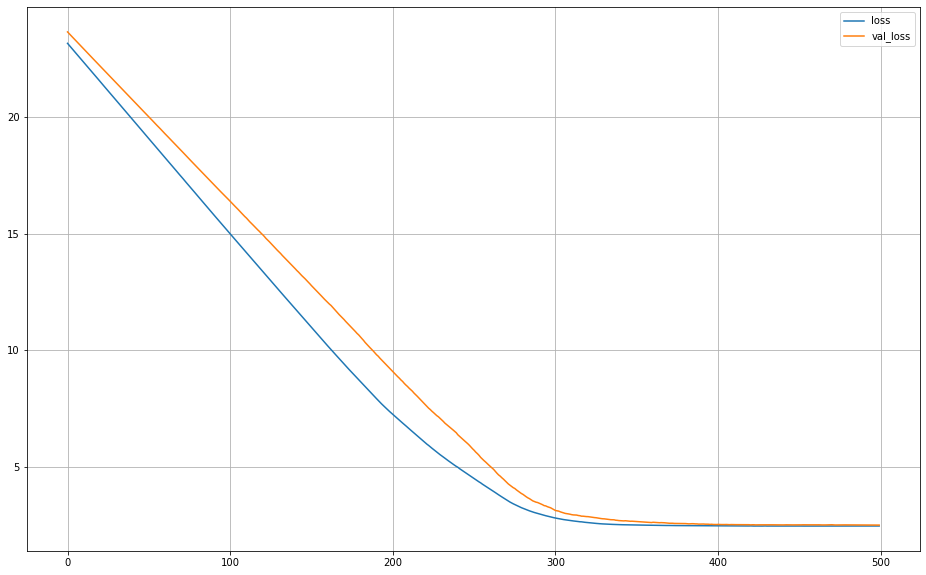

In [12]:
#learning rates
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.show()

In [13]:

#collect the results in a test set
test_results = {}
test_results['model'] = model.evaluate(
    test_features,
    test_labels, verbose=0)

In [14]:
#test your learned model with new data
x = tf.linspace(50, 250, 251)
y = model.predict(x)

In [15]:
def plot_output(x, y):
  plt.scatter(train_features["Horsepower"], train_labels, label='Data')
  plt.plot(x,y, color='k', label='Predictions')
  plt.xlabel("Horsepower")
  plt.ylabel(' MPG')
  plt.legend()

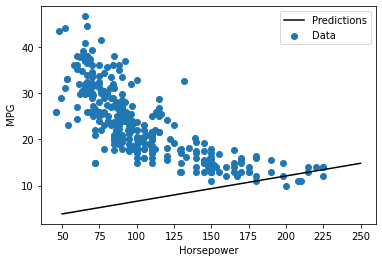

In [16]:
plot_output(x,y)